In [11]:
# Импорт моделей keras
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
# Импорт слоев
from tensorflow.keras.layers import Input, concatenate, Activation, MaxPooling2D, Conv2D, BatchNormalization, Flatten, Dense, Dropout, Conv2DTranspose, Concatenate, Reshape
# from tensorflow.keras import backend as K # Импортируем модуль backend keras'а
from tensorflow.keras.optimizers import Adam # Для установки шага обучения
# from tensorflow.keras import callbacks
from tensorflow.keras import utils # Для получения OHE-представления
import matplotlib.pyplot as plt # Для построения графиков
from tensorflow.keras.preprocessing import image # Для работы с изображениями
import numpy as np # Импортируем библиотеку numpy
# from sklearn.model_selection import train_test_split
import time
import random
import math
import os
from PIL import Image # импортируем модель Image для работы с изображениями
# import datetime

In [12]:
# Загружаем базу изображений с правильными ответами Cifar10
(x_train, y_train_original), (x_test, y_test_original) = cifar10.load_data()

In [13]:
# Выводим размерности обучающей и тестовой выборки
print("Обучающая выборка:")
print(x_train.shape)
print()

print("Правильные ответы в обучающей выборке:")
print(y_train_original.shape)
print()

print("Тестовая выборка:")
print(x_test.shape)
print()

print("Правильные ответы в тестовой выборке:")
print(y_test_original.shape)
print()

Обучающая выборка:
(50000, 32, 32, 3)

Правильные ответы в обучающей выборке:
(50000, 1)

Тестовая выборка:
(10000, 32, 32, 3)

Правильные ответы в тестовой выборке:
(10000, 1)



In [14]:
# Определяем названия классов изображений в зависимости от лэйбла
labels = ['Самолет', 'Автомобиль', 'Птица', 'Кот', 'Олень', 'Собака', 'Лягушка', 'Лошадь', 'Корабль', 'Грузовик']

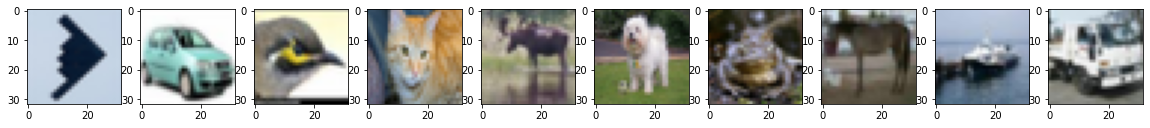

Правильные ответы: 0(Самолет); 1(Автомобиль); 2(Птица); 3(Кот); 4(Олень); 5(Собака); 6(Лягушка); 7(Лошадь); 8(Корабль); 9(Грузовик); 


In [15]:
# Выводим для примера картинки и лэйблы для каждого класса

fig, axs = plt.subplots(1, 10, figsize=(20, 3)) # Создаем полотно из 10 графиков
y = ''
for i in range(10): # Проходим по классам от 0 до 9
  label_indexes = np.where(y_train_original==i)[0] # Получаем список из индексов положений класса i в y_train
  index = random.choice(label_indexes) # Случайным образом выбираем из списка индекс
  img = x_train[index] # Выбираем из x_train нужное изображение
  label = y_train_original[index][0] # Берем ответ, который записан в 0 эл массива.
  y += str(label) + "("+labels[label]+"); " # Созраняем лэйблы для каждой картинки
  axs[i].imshow(Image.fromarray(img)) # Отображаем изображение i-ым графиков

# Отображаем картинки и соответствующие им лэйблы
plt.show()
print("Правильные ответы:", y)


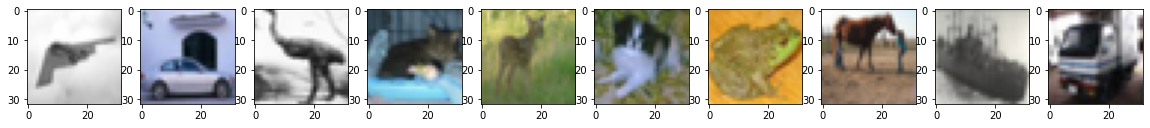

Правильные ответы: 0(Самолет); 1(Автомобиль); 2(Птица); 3(Кот); 4(Олень); 5(Собака); 6(Лягушка); 7(Лошадь); 8(Корабль); 9(Грузовик); 


In [16]:
# Выводим для примера картинки и лэйблы для каждого класса

fig, axs = plt.subplots(1, 10, figsize=(20, 3)) # Создаем полотно из 10 графиков
y = ''
for i in range(10): # Проходим по классам от 0 до 9
  label_indexes = np.where(y_train_original==i)[0] # Получаем список из индексов положений класса i в y_train
  index = random.choice(label_indexes) # Случайным образом выбираем из списка индекс
  img = x_train[index] # Выбираем из x_train нужное изображение
  label = y_train_original[index][0] # Берем ответ, который записан в 0 эл массива.
  y += str(label) + "("+labels[label]+"); " # Созраняем лэйблы для каждой картинки
  axs[i].imshow(Image.fromarray(img)) # Отображаем изображение i-ым графиков

# Отображаем картинки и соответствующие картинкам лэйблы
plt.show()
print("Правильные ответы:", y)


In [17]:
# Превращаем y_train и y_test сетей в формат one hot encoding
y_train = utils.to_categorical(y_train_original, 10)
y_test = utils.to_categorical(y_test_original, 10)

print("Обучающая выборка:")
print(y_train_original[5], "->", y_train[5])
print(y_train_original[234], "->", y_train[234])
print(y_train_original[45477], "->", y_train[45477])
print(y_train_original[14848], "->", y_train[14848])
print()

print("Тестовая выборка:")
print(y_train_original[15], "->", y_train[15])
print(y_train_original[334], "->", y_train[334])
print(y_train_original[8477], "->", y_train[8477])
print(y_train_original[3768], "->", y_train[3768])

Обучающая выборка:
[1] -> [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[6] -> [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[5] -> [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0] -> [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Тестовая выборка:
[9] -> [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[3] -> [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[2] -> [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[7] -> [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [18]:
# Разделяем тестовую выборку на проверочную и тестовую
x_val = x_test[0:9000]
y_val = y_test[0:9000]

x_test = x_test[9000:]
y_test = y_test[9000:]


In [19]:
# Проверим еще раз размерности выборотк

print("Обучающая выборка:")
print(x_train.shape)
print(y_train.shape)
print()

print("Проверочная выборка:")
print(x_val.shape)
print(y_val.shape)
print()

print("Тестовая выборка:")
print(x_test.shape)
print(y_test.shape)

Обучающая выборка:
(50000, 32, 32, 3)
(50000, 10)

Проверочная выборка:
(9000, 32, 32, 3)
(9000, 10)

Тестовая выборка:
(1000, 32, 32, 3)
(1000, 10)


#Обучение н.с.

In [21]:
img_input = Input((32, 32, 3))

# b = branch
# b_part = branch_part

# Первая ветка # Содержит подветки со своими особенностями
b1 = Conv2D(64, (3, 3), padding='same')(img_input)
b1 = BatchNormalization()(b1)
b1 = Activation('relu')(b1)
b1 = Dropout(0.2)(b1)
b1 = MaxPooling2D()(b1)

# Разделение ветки на 2

# Постепенное увеличение кол. формируемых признаков. Делаем их окном свёртки (3,3)
b1_part1 = Conv2D(128, (3, 3), padding='same')(b1) # 128 - Увеличели кол. формируемых признаков
b1_part1 = BatchNormalization()(b1_part1)
b1_part1 = Activation('relu')(b1_part1)
b1_part1 = Dropout(0.2)(b1_part1)
b1_part1 = MaxPooling2D()(b1_part1)

b1_part1 = Conv2D(256, (3, 3), padding='same')(b1_part1) # 256 - Увеличели кол. формируемых признаков
b1_part1 = BatchNormalization()(b1_part1)
b1_part1 = Activation('relu')(b1_part1)
b1_part1 = Dropout(0.2)(b1_part1)
b1_part1 = MaxPooling2D()(b1_part1)

# Постепенное увеличение кол. формируемых признаков. Делаем их окном свёртки (6,6)
b1_part2 = Conv2D(128, (6, 6), padding='same')(b1)
b1_part2 = BatchNormalization()(b1_part2)
b1_part2 = Activation('relu')(b1_part2)
b1_part2 = Dropout(0.2)(b1_part2)
b1_part2 = MaxPooling2D()(b1_part2)

b1_part2 = Conv2D(256, (6, 6), padding='same')(b1_part2)
b1_part2 = BatchNormalization()(b1_part2)
b1_part2 = Activation('relu')(b1_part2)
b1_part2 = Dropout(0.2)(b1_part2)
b1_part2 = MaxPooling2D()(b1_part2)

# Вторая ветка # Простое наращивание кол. формируемых признаков.
b2 = Conv2D(64, (3, 3), padding='same', activation='relu')(img_input)
b2 = BatchNormalization()(b2)
b2 = Dropout(0.2)(b2)
b2 = MaxPooling2D()(b2)

b2 = Conv2D(128, (3, 3), padding='same', activation='relu')(b2) # 128 - Увеличели кол. формируемых признаков
b2 = BatchNormalization()(b2)
b2 = Dropout(0.2)(b2)
b2 = MaxPooling2D()(b2)

b2 = Conv2D(256, (3, 3), padding='same', activation='relu')(b2) # 256 - Увеличели кол. формируемых признаков
b2 = BatchNormalization()(b2)
b2 = Dropout(0.2)(b2)
b2 = MaxPooling2D()(b2)

# Соединяем сразу все ветки.
# Кол. формируемых в их последних слоях признаков должно быть одинаковым. В этом случае оно = 256
branch_united = concatenate([b1_part2, b1_part1, b2]) 

# Ещё несколько операций с полученной веткой

branch_united = Conv2D(256, (4, 4), padding='same')(branch_united)
branch_united = Flatten()(branch_united)
branch_united = Dense(10, activation='softmax')(branch_united)

functional_network_model = Model(img_input, branch_united)
functional_network_model.compile(loss="categorical_crossentropy", optimizer=Adam(), metrics=["accuracy"])

In [23]:
functional_network_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_9 (Conv2D)              (None, 32, 32, 64)   1792        ['input_2[0][0]']                
                                                                                                  
 batch_normalization_8 (BatchNo  (None, 32, 32, 64)  256         ['conv2d_9[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 activation_5 (Activation)      (None, 32, 32, 64)   0           ['batch_normalization_8[0][

Epoch 1/10
5000/5000 [==============================] - 60s 12ms/step - loss: 1.0693 - accuracy: 0.6267 - val_loss: 1.0717 - val_accuracy: 0.6238
Epoch 2/10
5000/5000 [==============================] - 60s 12ms/step - loss: 0.9398 - accuracy: 0.6737 - val_loss: 1.1989 - val_accuracy: 0.5964
Epoch 3/10
5000/5000 [==============================] - 60s 12ms/step - loss: 0.8644 - accuracy: 0.6981 - val_loss: 0.9084 - val_accuracy: 0.6853
Epoch 4/10
5000/5000 [==============================] - 61s 12ms/step - loss: 0.8062 - accuracy: 0.7204 - val_loss: 1.3510 - val_accuracy: 0.5696
Epoch 5/10
5000/5000 [==============================] - 61s 12ms/step - loss: 0.7603 - accuracy: 0.7387 - val_loss: 1.1945 - val_accuracy: 0.6291
Epoch 6/10
5000/5000 [==============================] - 61s 12ms/step - loss: 0.7217 - accuracy: 0.7523 - val_loss: 0.9577 - val_accuracy: 0.6910
Epoch 7/10
5000/5000 [==============================] - 61s 12ms/step - loss: 0.6918 - accuracy: 0.7601 - val_loss: 0.9872 -

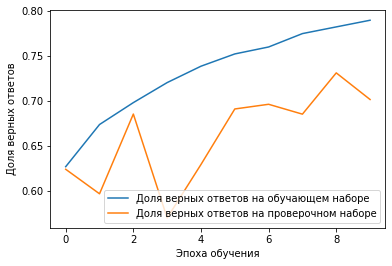

In [25]:
# Обучение сети
batch_size = 10
history = functional_network_model.fit(x_train, 
                    y_train, 
                    batch_size=batch_size, 
                    epochs=10,
                    validation_data=(x_val, y_val),
                    verbose=1)

# Отображение графика
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

Epoch 1/5
500/500 [==============================] - 18s 34ms/step - loss: 0.4067 - accuracy: 0.8565 - val_loss: 0.6444 - val_accuracy: 0.7907
Epoch 2/5
500/500 [==============================] - 17s 33ms/step - loss: 0.3535 - accuracy: 0.8760 - val_loss: 0.6387 - val_accuracy: 0.7947
Epoch 3/5
500/500 [==============================] - 17s 33ms/step - loss: 0.3270 - accuracy: 0.8850 - val_loss: 0.6874 - val_accuracy: 0.7794
Epoch 4/5
500/500 [==============================] - 17s 33ms/step - loss: 0.3045 - accuracy: 0.8924 - val_loss: 0.6591 - val_accuracy: 0.7948
Epoch 5/5
500/500 [==============================] - 17s 33ms/step - loss: 0.2855 - accuracy: 0.8990 - val_loss: 0.7068 - val_accuracy: 0.7889


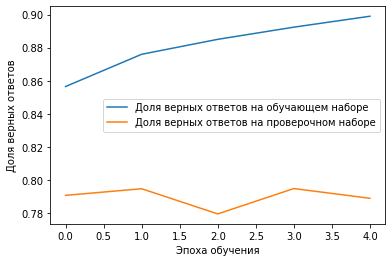

In [26]:
# Обучение с меньшим шагом

functional_network_model.compile(loss="categorical_crossentropy", optimizer=Adam(0.001), metrics=["accuracy"])

# Обучение сети
batch_size = 100
history = functional_network_model.fit(x_train, 
                    y_train, 
                    batch_size=batch_size, 
                    epochs=5,
                    validation_data=(x_val, y_val),
                    verbose=1)

# Отображение графика
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

Epoch 1/10
500/500 [==============================] - 18s 34ms/step - loss: 0.2690 - accuracy: 0.9039 - val_loss: 0.8896 - val_accuracy: 0.7592
Epoch 2/10
500/500 [==============================] - 17s 33ms/step - loss: 0.2507 - accuracy: 0.9106 - val_loss: 0.7727 - val_accuracy: 0.7806
Epoch 3/10
500/500 [==============================] - 17s 33ms/step - loss: 0.2446 - accuracy: 0.9132 - val_loss: 0.8907 - val_accuracy: 0.7676
Epoch 4/10
500/500 [==============================] - 17s 33ms/step - loss: 0.2340 - accuracy: 0.9160 - val_loss: 0.7392 - val_accuracy: 0.7903
Epoch 5/10
500/500 [==============================] - 17s 33ms/step - loss: 0.2226 - accuracy: 0.9189 - val_loss: 1.0234 - val_accuracy: 0.7549
Epoch 6/10
500/500 [==============================] - 17s 33ms/step - loss: 0.2137 - accuracy: 0.9234 - val_loss: 0.8667 - val_accuracy: 0.7719
Epoch 7/10
500/500 [==============================] - 17s 33ms/step - loss: 0.2067 - accuracy: 0.9257 - val_loss: 1.5954 - val_accuracy:

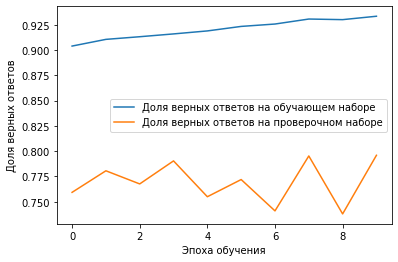

In [27]:
# Обучение с меньшим шагом

functional_network_model.compile(loss="categorical_crossentropy", optimizer=Adam(0.001), metrics=["accuracy"])

# Обучение сети
batch_size = 100
history = functional_network_model.fit(x_train, 
                    y_train, 
                    batch_size=batch_size, 
                    epochs=10,
                    validation_data=(x_val, y_val),
                    verbose=1)

# Отображение графика
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

Epoch 1/5
500/500 [==============================] - 18s 34ms/step - loss: 0.0958 - accuracy: 0.9656 - val_loss: 0.8202 - val_accuracy: 0.8063
Epoch 2/5
500/500 [==============================] - 17s 33ms/step - loss: 0.0919 - accuracy: 0.9677 - val_loss: 0.8305 - val_accuracy: 0.8057
Epoch 3/5
500/500 [==============================] - 17s 33ms/step - loss: 0.0913 - accuracy: 0.9676 - val_loss: 0.8088 - val_accuracy: 0.8113
Epoch 4/5
500/500 [==============================] - 17s 33ms/step - loss: 0.0875 - accuracy: 0.9681 - val_loss: 0.8422 - val_accuracy: 0.8070
Epoch 5/5
500/500 [==============================] - 16s 33ms/step - loss: 0.0852 - accuracy: 0.9686 - val_loss: 0.8232 - val_accuracy: 0.8081


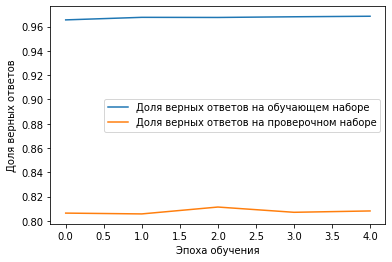

In [29]:
# Обучение с ещё меньшим шагом

functional_network_model.compile(loss="categorical_crossentropy", optimizer=Adam(0.0001), metrics=["accuracy"])

# Обучение сети
batch_size = 100
history = functional_network_model.fit(x_train, 
                    y_train, 
                    batch_size=batch_size, 
                    epochs=5,
                    validation_data=(x_val, y_val),
                    verbose=1)

# Отображение графика
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

Epoch 1/5
500/500 [==============================] - 9s 16ms/step - loss: 0.1513 - accuracy: 0.9460 - val_loss: 0.5503 - val_accuracy: 0.8597
Epoch 2/5
500/500 [==============================] - 7s 15ms/step - loss: 0.1484 - accuracy: 0.9477 - val_loss: 0.5684 - val_accuracy: 0.8589
Epoch 3/5
500/500 [==============================] - 7s 15ms/step - loss: 0.1526 - accuracy: 0.9448 - val_loss: 0.5565 - val_accuracy: 0.8600
Epoch 4/5
500/500 [==============================] - 7s 15ms/step - loss: 0.1543 - accuracy: 0.9455 - val_loss: 0.5838 - val_accuracy: 0.8594
Epoch 5/5
500/500 [==============================] - 7s 15ms/step - loss: 0.1556 - accuracy: 0.9455 - val_loss: 0.5460 - val_accuracy: 0.8593


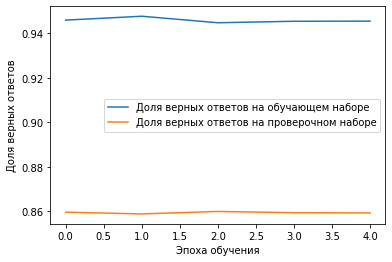

In [ ]:
# Этот результат был получен в другом колабе с н.с. без разветвелений и другйо структурой.

# Лучший результат, который я смог достичь при learning_rate=0.0001 и batch_size = 100
# Epoch 5/5
# 500/500 [==============================] - 5s 10ms/step - loss: 0.0788 - accuracy: 0.9721 - val_loss: 0.7158 - val_accuracy: 0.8640